In [139]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [141]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gene One        3000 non-null   float64
 1   Gene Two        3000 non-null   float64
 2   Cancer Present  3000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 70.4 KB


<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
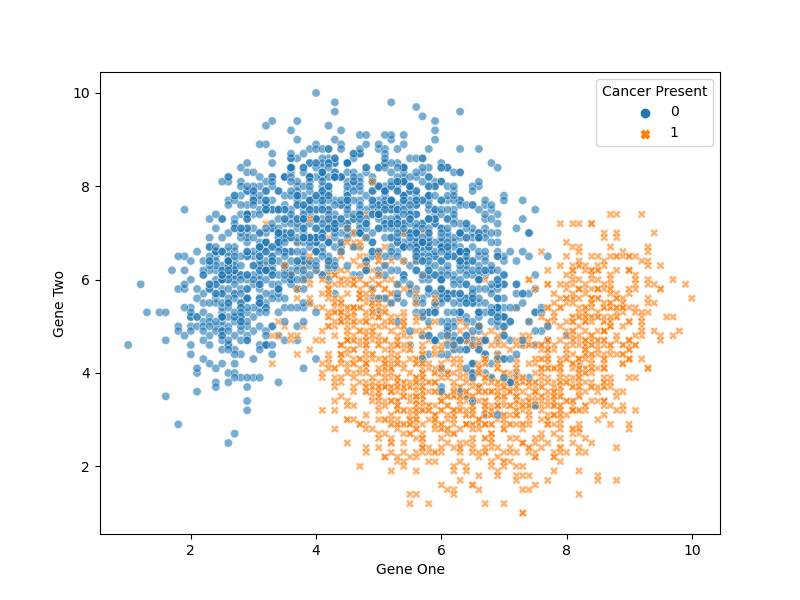

In [143]:
plt.figure(figsize=(8, 6), dpi=100)
sns.scatterplot(data=df, x='Gene One', y='Gene Two', hue='Cancer Present', alpha=0.6, style='Cancer Present')
# plt.xlim(2, 6)
# plt.ylim(4, 8)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
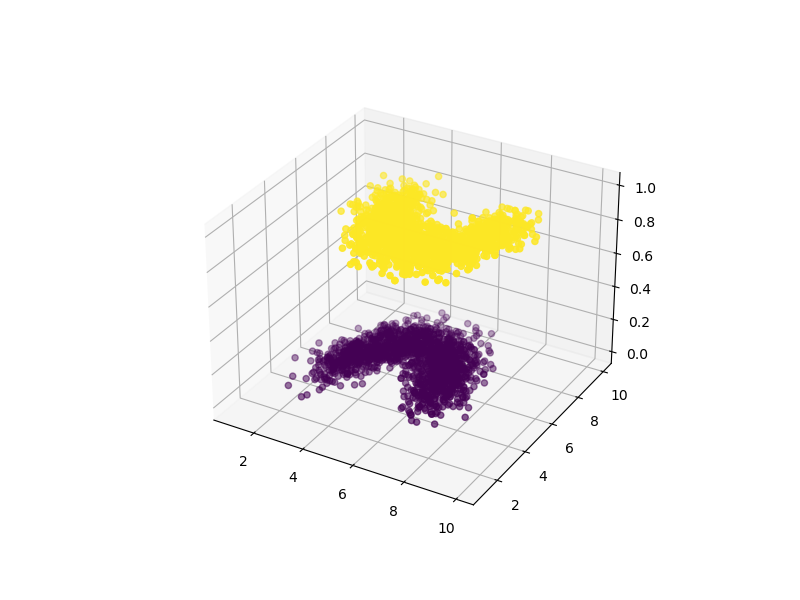

In [144]:
fig = plt.figure(figsize=(8, 6), dpi=100)
ax = fig.add_subplot(projection='3d')
ax.scatter(df['Gene One'], df['Gene Two'], df['Cancer Present'], c=df['Cancer Present'], cmap='viridis')

<AxesSubplot:xlabel='Cancer Present', ylabel='count'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
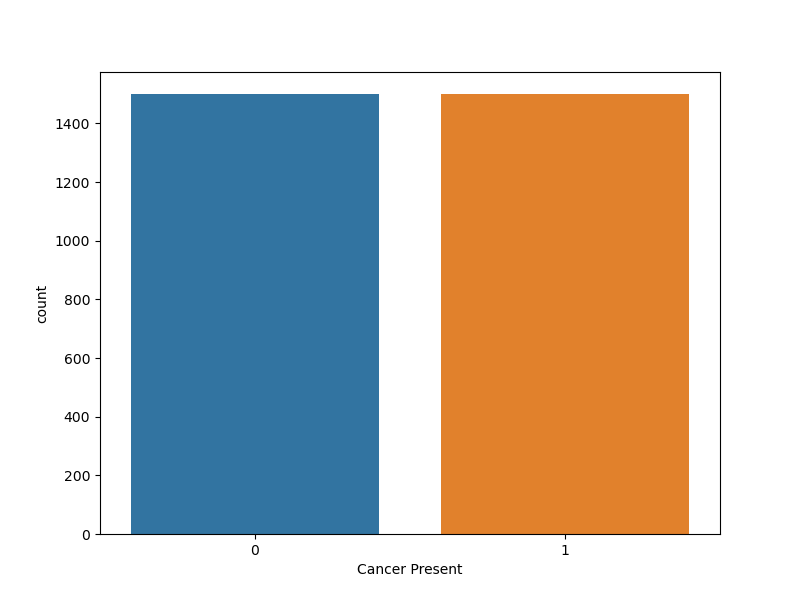

In [145]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(data=df, x='Cancer Present')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
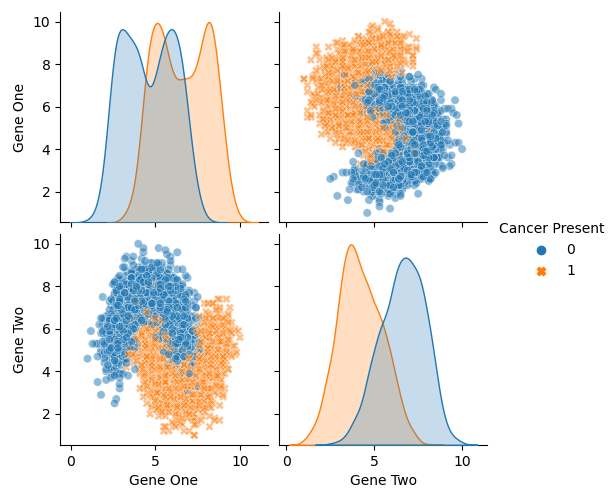

In [146]:
sns.pairplot(df, hue='Cancer Present', plot_kws={'alpha': 0.5, 'style': df['Cancer Present']})

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [153]:
from sklearn.neighbors import KNeighborsClassifier

In [154]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [155]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [156]:
y_pred = knn_model.predict(X_test)

In [157]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, classification_report

In [158]:
confusion_matrix(y_test, y_pred)

array([[420,  50],
       [ 47, 383]])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
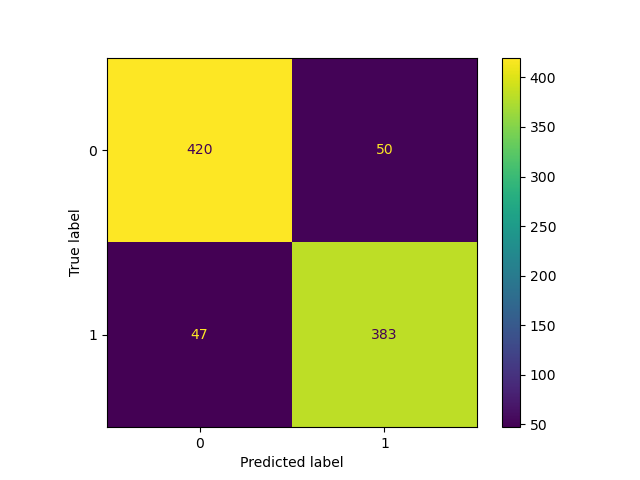

In [159]:
plot_confusion_matrix(knn_model, X_test, y_test)

In [160]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       470
           1       0.88      0.89      0.89       430

    accuracy                           0.89       900
   macro avg       0.89      0.89      0.89       900
weighted avg       0.89      0.89      0.89       900



In [161]:
from sklearn.metrics import accuracy_score

test_error_rates = []
n = 30

In [162]:
for k in range(1, n):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_pred)
    
    test_error_rates.append(error)

Text(0, 0.5, 'ERROR RATE')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
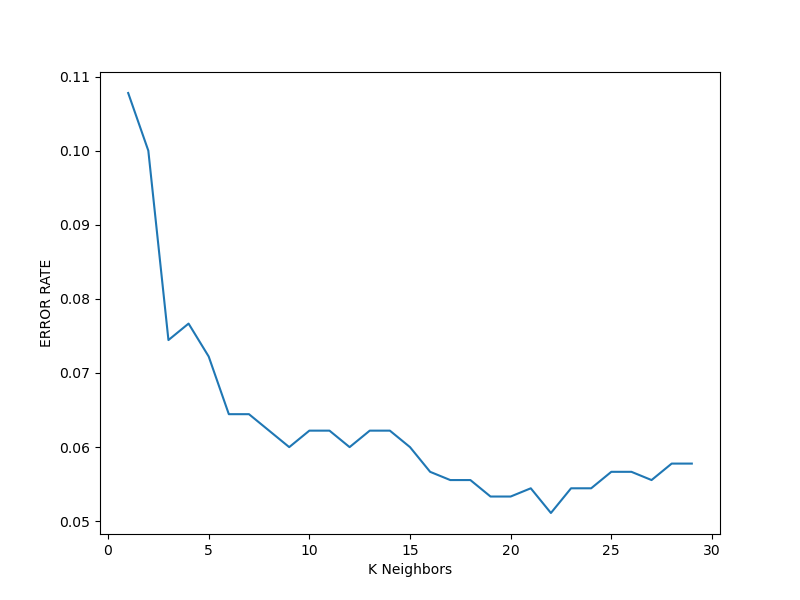

In [163]:
plt.figure(figsize=(8, 6), dpi=100)
sns.lineplot(x=range(1, n), y=test_error_rates)

plt.xlabel('K Neighbors')
plt.ylabel('ERROR RATE')

## PIPELINE --> GRIDSEARCH CV

In [164]:
scaler = StandardScaler()

In [165]:
knn_model = KNeighborsClassifier()

In [166]:
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [167]:
operations = [('scaler', scaler), ('knn', knn_model)]

In [168]:
from sklearn.pipeline import Pipeline

In [169]:
pipe = Pipeline(steps=operations)

In [170]:
from sklearn.model_selection import GridSearchCV

In [171]:
param_grid = {'knn__n_neighbors': np.arange(1, 20), 'knn__p': [1, 2], 'knn__metric': ['minkowski']}

In [172]:
grid_model = GridSearchCV(pipe, param_grid=param_grid, scoring='accuracy', cv=10, verbose=1)

In [173]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed:    2.8s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['minkowski'],
                         'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'knn__p': [1, 2]},
             scoring='accuracy', verbose=1)

In [174]:
grid_model.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 19, 'knn__p': 2}

In [175]:
grid_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [176]:
y_pred = grid_model.predict(X_test)

In [177]:
from sklearn.metrics import plot_confusion_matrix, classification_report

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
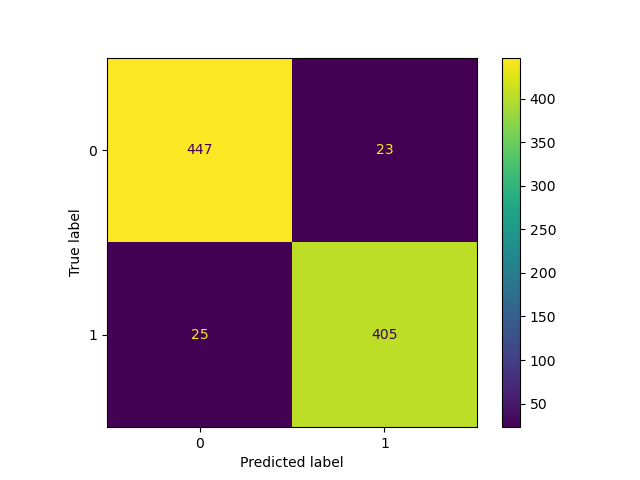

In [178]:
plot_confusion_matrix(grid_model, X_test, y_test)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       470
           1       0.95      0.94      0.94       430

    accuracy                           0.95       900
   macro avg       0.95      0.95      0.95       900
weighted avg       0.95      0.95      0.95       900



## final Model

In [180]:
grid_model.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 19, 'knn__p': 2}

In [181]:
df = pd.read_csv('../DATA/gene_expression.csv')

In [182]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [238]:
X = df.drop('Cancer Present', axis=1)

In [239]:
y = df['Cancer Present']

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [241]:
scaler = StandardScaler()

In [242]:
final_knn_model = KNeighborsClassifier(metric='minkowski', n_neighbors=19, p=2)

In [243]:
operations = [('scaler', scaler), ('knn', final_knn_model)]

In [244]:
pipe = Pipeline(operations)

In [245]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [246]:
y_pred = pipe.predict(X_test)

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       401
           1       0.94      0.93      0.94       349

    accuracy                           0.94       750
   macro avg       0.94      0.94      0.94       750
weighted avg       0.94      0.94      0.94       750



In [326]:
test_data_point = X_test.iloc[np.random.randint(0, len(X_test))]

In [327]:
test_data_point

Gene One    3.5
Gene Two    5.1
Name: 2087, dtype: float64

In [329]:
pipe.predict(test_data_point.values.reshape(1, -1))

array([0])

In [330]:
pipe.predict_proba(test_data_point.values.reshape(1, -1))

array([[0.63157895, 0.36842105]])

## final Model with whole data

In [378]:
grid_model.best_params_

{'knn__metric': 'minkowski', 'knn__n_neighbors': 19, 'knn__p': 2}

In [379]:
scaler = StandardScaler()

In [380]:
final_knn_model = KNeighborsClassifier(metric='minkowski', n_neighbors=19, p=2)

In [381]:
operations = [('scaler', scaler), ('knn', final_knn_model)]

In [382]:
pipe = Pipeline(steps=operations)

In [388]:
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=19))])

In [389]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       401
           1       0.95      0.94      0.94       349

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



In [390]:
from joblib import dump, load

In [391]:
dump(pipe, 'final_knn_model')

['final_knn_model']

In [392]:
final_loaded_knn_model = load('final_knn_model')

In [399]:
test_data_point = X_test.iloc[np.random.randint(0, len(X_test))]

In [400]:
test_data_point

Gene One    5.0
Gene Two    7.5
Name: 765, dtype: float64

In [401]:
final_loaded_knn_model.predict(test_data_point.values.reshape(1, -1))

array([0])

In [402]:
final_loaded_knn_model.predict_proba(test_data_point.values.reshape(1, -1))

array([[1., 0.]])

In [403]:
y_pred = final_loaded_knn_model.predict(X_test)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
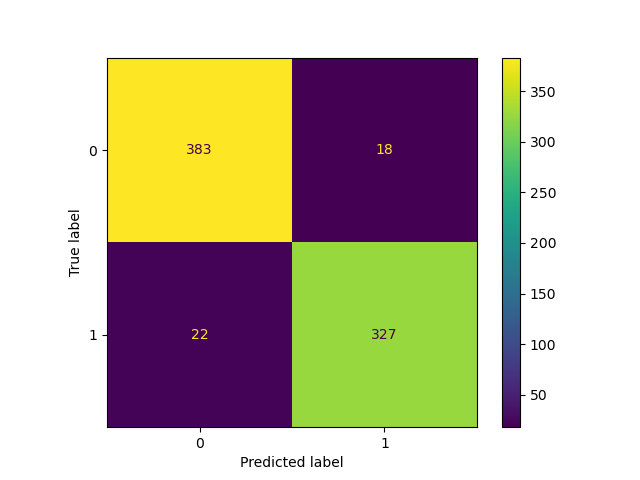

In [404]:
plot_confusion_matrix(final_loaded_knn_model, X_test, y_test)

In [405]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       401
           1       0.95      0.94      0.94       349

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750

